# Modul 6 Praktikum Sains Data

## Outline
1. Clustering
2. K-Means

# 1. Clustering

- Termasuk dalam kategori unsupervised learning (data tidak memiliki label)
- Mengelompokkan data data dengan sifat/karakteristik yg sama sebagai satu cluster
- Cluster : sekelompok objek yang memiliki kesamaan dengan objek yang ada di cluster tersebut dan berbeda dengan objek di cluster lainnya
- Aplikasi : rekomendasi film/musik pada aplikasi, iklan pada sosmed, dll.

![](./clustering.jpg)

# 2. K-Means

K-Means bertujuan memperkecil jarak antar data (SSE) dalam cluster dan memperbesar jarak antar cluster

> $$SSE = \sum (x_i -c_j)^2$$

**Langkah-Langkah:**
1. Tentukan centroid untuk k cluster
2. Hitung jarak tiap data dengan centroid
3. Assign data ke centroid terdeka
4. Tentukan centroid baru
5. Ulangi langkah 1 - 4

## 1. K-means Clustering menggunakan dataset random

Contoh K-Means clustering menggunakan data random.

In [1]:
#import modul yang diperlukan
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

### Data

In [2]:
#data
np.random.seed(0)

In [3]:
#membuat sample, dengan centroid sebagai berikut
X, y = make_blobs(n_samples= 5000, centers = [[4,4],[-2,-1],[2,-3],[1,1]], cluster_std=0.9)

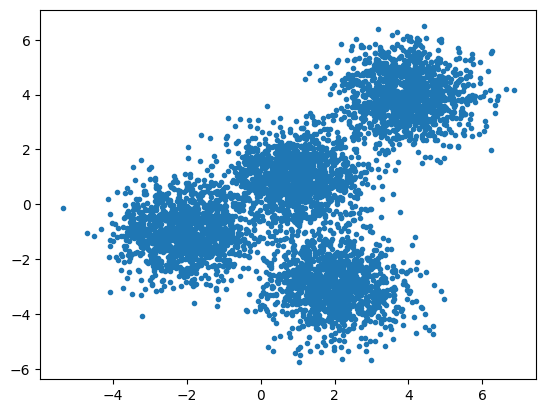

In [4]:
#menggambar plot dari sample
plt.scatter(X[:,0], X[:,1],marker='.')

### Membuat model

In [5]:
#buat model k-means, jumlah cluster 4, algoritma akan diulang sebanyak 12 kali
k_means = KMeans(init="k-means++", n_clusters = 4, n_init =12)

In [6]:
#fitting x ke model
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

### Output hasil clustering

In [7]:
#hasil clustering pada data
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0])

In [8]:
#centroid dari 4 cluster setelah menggunakan model k-means
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

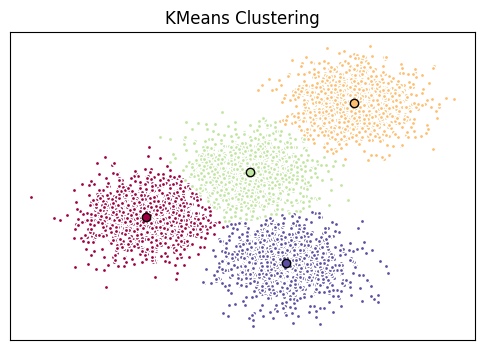

In [9]:
#plot hasil clustering
fig = plt.figure(figsize=(6,4))
colors = plt.cm.Spectral(np.linspace(0,1, len(set(k_means_labels))))
ax= fig.add_subplot(1,1,1)
for k, col in zip(range(len([[4,4],[-2,-1],[2,-3],[1,1]])), colors) :
 my_members = (k_means_labels==k)
 cluster_center = k_means_cluster_centers[k]
 ax.plot(X[my_members,0], X[my_members,1], 'w', markerfacecolor=col,marker='.')
 ax.plot(cluster_center[0],cluster_center[1],'o',markerfacecolor=col,markeredgecolor='k',markersize=
6)
ax.set_title('KMeans Clustering')
#hilangkan sumbu
ax.set_xticks(())
ax.set_yticks(())
plt.show()

## 2. Clustering menggunakan dataset (csv)

Pada contoh ini, akan dilakukan clustering menggunakan dataset nasabah bank (`Cust_Segmentation.csv`). 
- [Kaggle](https://www.kaggle.com/datasets/sam1o1/cust-segmentation)

Nasabah tersebut akan dikelompokkan menjadi 3 cluster.

In [10]:
#import modul dan membaca dataset
import pandas as pd
cust_df = pd.read_csv(r'./Cust_Segmentation.csv')

### Data

In [11]:
#cuplikan dataset
cust_df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2

In [12]:
#periksa tipe data dari masing masing kolom pada dataset
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


### Preprocessing data

In [13]:
#buat semua data menjadi numerik
cust_df2 = cust_df.drop('Address',axis=1)
cust_df2.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  
0        0.0              6.3  
1        0.0             12.8  
2        1.0             20.9  
3        0.0              6.3  
4        0.0              7.2

In [14]:
cust_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [15]:
#scaling value yang terdapat pada dataset agar error tidak besar
from sklearn.preprocessing import StandardScaler
X = cust_df2.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet= StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

### Membuat model

In [16]:
#modelling
clusterNum = 3
k_means_cust = KMeans(init = 'k-means++', n_clusters= clusterNum, n_init = 12) 
#3 cluster, dengan running algoritma sebanyak 12 kali

k_means_cust.fit(X)

#hasil clustering
labels_cust = k_means_cust.labels_
print(labels_cust)

[2 0 2 2 1 0 2 0 2 0 0 2 2 2 2 2 2 2 0 2 2 2 2 0 0 0 2 2 0 2 0 2 2 2 2 2 2
 2 2 0 2 0 2 1 2 0 2 2 2 0 0 2 2 0 0 2 2 2 0 2 0 2 0 0 2 2 0 2 2 2 0 0 0 2
 2 2 2 2 0 2 0 0 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 2 2 2 0 2 0 0 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 0 2
 2 2 2 2 0 2 2 0 2 0 2 2 0 1 2 0 2 2 2 2 2 2 1 0 2 2 2 2 0 2 2 0 0 2 0 2 0
 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 2 2 2
 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 2 0 0 2
 2 2 2 2 0 2 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2 0 2 2 2 1 2 2 2 0 2 0 0 0 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 1
 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 0 2 1 2 2 2 2 0 2 0 0 0 2 2 0 0 2 2 2 2 2 2
 2 0 2 2 2 2 0 2 2 2 0 2 

In [17]:
#menambahkan kolom hasil clustering pada dataset
cust_df2['Clus_km'] = labels_cust
cust_df2.head(5)

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  Clus_km  
0        0.0              6.3        2  
1        0.0             12.8        0  
2        1.0             20.9        2  
3        0.0              6.3        2  
4        0.0              7.2        1

In [18]:
#melihat rata rata per cluster
cust_df2.groupby('Clus_km').mean()

Customer Id        Age       Edu  Years Employed      Income  \
Clus_km                                                                 
0         402.295082  41.333333  1.956284       15.256831   83.928962   
1         410.166667  45.388889  2.666667       19.555556  227.166667   
2         432.468413  32.964561  1.614792        6.374422   31.164869   

         Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
Clus_km                                                     
0         3.103639    5.765279   0.171233        10.724590  
1         5.678444   10.907167   0.285714         7.322222  
2         1.032541    2.104133   0.285185        10.094761

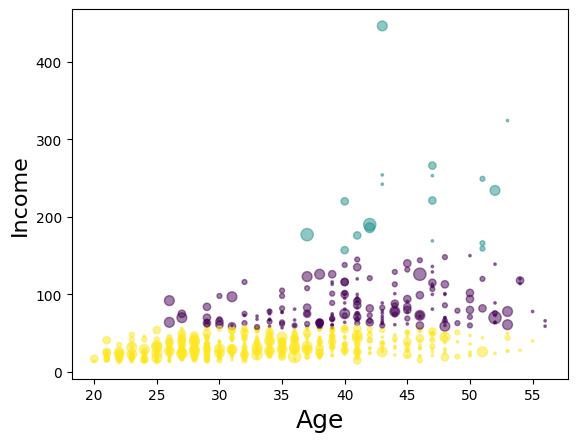

In [20]:
#plot hasil clustering berdasarkan age dan income
area = np.pi * (X[:, 1])**2
plt.scatter(X[:,0],X[:,3],s = area, c = labels_cust.astype(float), alpha=0.5)
plt.xlabel('Age',fontsize=18)
plt.ylabel('Income',fontsize = 16)
plt.show()

### Kesimpulan

Dari datset diatas, kita dapat membuat 3 cluster, dengan segmentasi sebagai berikut: 

- Kuning : dewasa muda, pendapatan rendah 
- Ungu: dewasa menengah, pendapatan kelas menengah 
- Hijau: dewasa tua, pendapatan tinggi